# Introducción a ScyPy
A continuación veremos algunos ejemplos de uso de ScyPy. Esta biblioteca permite el trabajo en múltiples tareas relacionadas con distancias, optimización, imágenes, álgebra, etc...

## Distancias
En primer lugar vamos a realizar un ejemplo de trabajo con distancias. Gracias a ScyPy es posible el cálculo de múltiples tipos de distancias.

A continuación se muestra como realizar el cálculo de la distancia euclidea, para ello usamos la función `scipy.spatial.distance.pdist`, ademas esta la complementamos con la función `squareform` la cual convierte el vector de distancia a formato matricial.

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

x = np.array([[0, 1], [1, 0], [1, 1]])
print(x)

dEuclidea =squareform(pdist(x, 'euclidean'))
print(dEuclidea)

[[0 1]
 [1 0]
 [1 1]]
[[0.         1.41421356 1.        ]
 [1.41421356 0.         1.        ]
 [1.         1.         0.        ]]


También podemos calcular la distancia coseno.

In [2]:

dCoseno = squareform(pdist(x, 'cosine'))
print(dCoseno)

[[0.         1.         0.29289322]
 [1.         0.         0.29289322]
 [0.29289322 0.29289322 0.        ]]


Ademas de estas dos distancias se pueden calcular muchas otras distancias, puedes ver todas las posibilidades en el siguiente [link](https://cs231n.github.io/python-numpy-tutorial/#scipy).

También es posible obtener las distancias entre dos conjunos de datos, para ello podemos usar la función `scipy.spatial.distance.cdist`.

In [3]:
from scipy.spatial.distance import cdist

x = np.array([[0, 1], [1, 0], [1, 1]])
y = np.array([[0, 0], [2, 0], [1, 1]])
dManhattan = cdist(x, y, 'cityblock')

print(dManhattan)

[[1. 3. 1.]
 [1. 1. 1.]
 [2. 2. 0.]]


Al igual que con `dist` existen otras muchas distancias, que puedes cosnultar en el siguiente [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html)

## Optimización
Esta biblioteca contiene una gran cantidad de implementaciones de metodos para optimización, puedes encontrar mas información en el siguiente [link](https://docs.scipy.org/doc/scipy/reference/optimize.html).

A continuación vamos a mostrar un ejemplo en el que se desea obtener el punto mínimo de una curva. Esta tarea se puede realizar de manera analítica si la función es derivable, pero en muchos problemas de la vida real esto no es posible, por lo que es encesario este tipo de técnicas.

En este ejemplo vamos a usar la técnica de gradiente descendente, la cual es de uso común en el entrenamiento de redes neuronales. Para este ejemplo vamos a buscar el mínimo global de la función de Rosenbrock.

In [4]:
from scipy import optimize

#Funcion de Rosenbrock
def f(x):   
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

optimize.minimize(f, [2, -1], method="CG")

     fun: 1.6503729082243953e-11
     jac: array([-6.15347610e-06,  2.53804028e-07])
 message: 'Optimization terminated successfully.'
    nfev: 108
     nit: 13
    njev: 27
  status: 0
 success: True
       x: array([0.99999426, 0.99998863])

### Estimar funciones
Tambien podemos estimar una función a partir de una serie de puntos, como haremos en siguiente ejemplo. 

Antes de comenzar vamos a instalar el paquete `matplotlib` para la visualización de gráficos.

In [5]:
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: done

## Package Plan ##

  environment location: /Users/Mario/anaconda

  added / updated specs:
    - matplotlib


The following packages will be UPDATED:

  ca-certificates                              2019.10.16-0 --> 2020.6.24-0
  conda                                       4.7.12-py27_0 --> 4.8.4-py27_0
  openssl                                 1.1.1d-h1de35cc_3 --> 1.1.1g-h1de35cc_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
ERROR conda.core.link:_execute(700): An error occurred while uninstalling package 'defaults::conda-4.7.12-py27_0'.
Rolling back transaction: done

CondaMultiError: [Errno 13] Permission denied
()



Una vez tenemos todo lo necesario vamos a resolver el problema de estimar una función a partir de una serie de puntos. Para ello los pasos serán:
1. Generar la función a estimar
2. Generar los puntos y añadirle ruido
3. Estimar la función
4. Pintaremos los resultados

#### Función a estimar
A continaución definimos una función con tres parámetros que será la que usaremos como test

In [30]:
def f(x, y, z):
    return np.sin(x * y + z)

#### Generación de los puntos
Vamos a generar 50 puntos distribuidos a la misma distancia entre los valores de 0 y 3, para posteriormente evaluarlos con la función y añadirle ruido.

In [31]:
np.random.seed(0)

#X 50 puntos entres 0 y 3 con separación uniforme
x = np.linspace(0, 3, 50)
#Y evaluamos los datos y le añadimso ruido normal
y = f(x, 1.5, 1) + .1*np.random.normal(size=50)

#### Estimar la función
A cotinuación vamos a buscar la función que mejor se "adapta" a los puntos que hemos generado

In [37]:
params, params_cov = optimize.curve_fit(f, x, y)
print params

[1.44874636 1.06514835]


Como podemos observar los parametros son muy cercanos al 1,5 y 1 que pasamos al generar los datos.

### Resultados

A continuación vamos a pintar los puntos generados (cruz azul) y la curva estimada (linea roja), pudiendose obsevar el buen ajuste de esta a los puntos

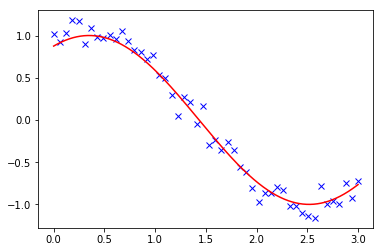

In [33]:
import matplotlib.pyplot as plt


# plot the data and the fitted curve
t = np.linspace(0, 3, 1000)

plt.figure(1)
plt.clf()
plt.plot(x, y, 'bx')
plt.plot(t, f(t, *params), 'r-')
plt.show()
